Create two random data sets with two features and two classes

Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Consider that you are given a car height and you have the class label as 1 if cost of car is greater than 550 and 0 if it is less than or equal to 550.

In [ ]:
data = pd.read_csv('/content/Data.csv').to_numpy()

# Create the labels from the data

In [ ]:
label = []
x_c1 = []
x_c2 = []
c1_count = 0
c2_count = 0
for i in range(data.shape[0]):
  if(data[i][1] > 550):
    label.append(1)
    x_c1.append(data[i][0])
    c1_count += 1
  else:
    label.append(0)
    x_c2.append(data[i][0])
    c2_count += 1

# Plotting the distribution of samples.

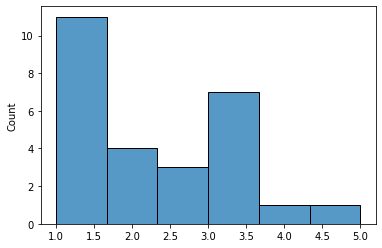

In [ ]:
import seaborn as sns
x = data[:,0]
sns.histplot(x)
#Not a preferred way to plot distribution

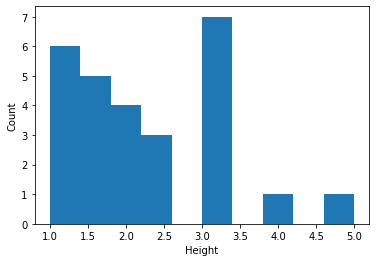

In [ ]:
#This gives a clear idea
plt.hist(x)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

# Prior Probabilities for both the classes

In [ ]:
no_of_samples = len(data)
prob_c1 = c1_count/no_of_samples
prob_c2 = c2_count/no_of_samples
print("Prior Class 1:",prob_c1)
print("Prior Class 2:",prob_c2)

Prior Class 1: 0.8518518518518519
Prior Class 2: 0.14814814814814814


# Unique Values

In [ ]:
from collections import Counter
unique_c1 = Counter(x_c1).keys()
count_unique_c1 = list(Counter(x_c1).values())
unique_c2 = Counter(x_c2).keys()
count_unique_c2 = list(Counter(x_c2).values())

Plot the count of each unique element of the feature

In [ ]:
unique_c1

dict_keys([3.0, 4.0, 2.0, 1.0, 1.5, 2.5])

In [ ]:
count_unique_c1

[6, 1, 4, 5, 5, 2]

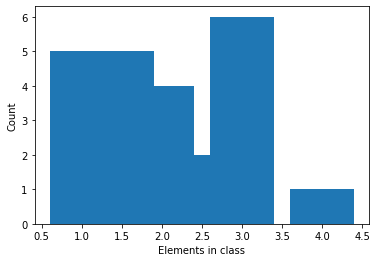

In [ ]:
#Not a preferred way to plot distribution
plt.bar(unique_c1,count_unique_c1)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

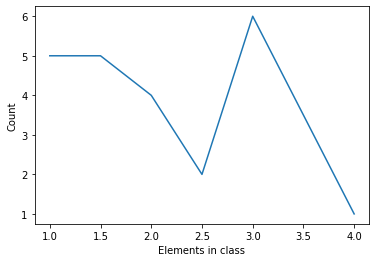

In [ ]:
sns.lineplot(list(unique_c1),count_unique_c1)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

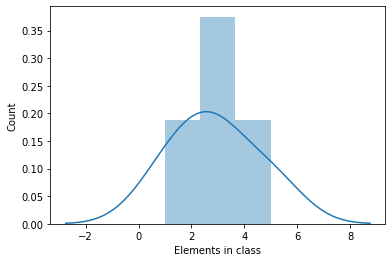

In [ ]:
#Probability distribution of x_c2
sns.distplot(x_c2)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

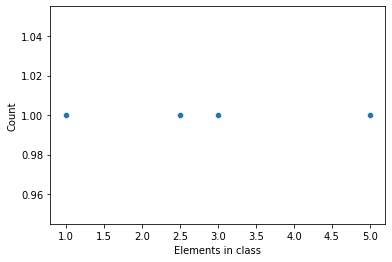

In [ ]:
#Plot for the unique values in class c2
sns.scatterplot(list(unique_c2),count_unique_c2)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

# Likelihood

Plot P(x|C1) and P(x|C2)

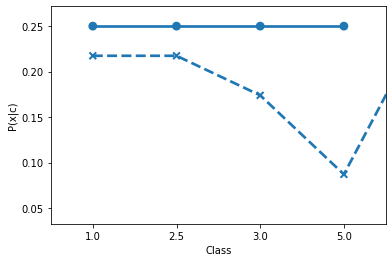

In [ ]:
#sns.color_palette("Paired", 9)
y1 = np.array(count_unique_c1)/len(x_c1)
sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'] )
y2 = np.array(count_unique_c2)/len(x_c2)
sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(x|c)")
plt.show()

# Posterior Probability

In [ ]:
full = x_c1
full.extend(x_c2)
cnt = Counter(full)
cnt

Counter({1.0: 6, 1.5: 5, 2.0: 4, 2.5: 3, 3.0: 7, 4.0: 1, 5.0: 1})

In [ ]:
prob_x_c1 = [cnt[x]/no_of_samples for x in unique_c1]
prob_x_c2 = [cnt[x]/no_of_samples for x in unique_c2]

In [ ]:
prob_x_c2

[0.2222222222222222,
 0.037037037037037035,
 0.25925925925925924,
 0.1111111111111111]

Plot P(C1|x) and P(C2|x)

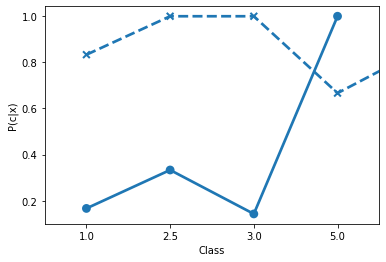

In [ ]:
post1 = y1*prob_c1/prob_x_c1
post2 = y2*prob_c2/prob_x_c2

sns.pointplot(list(unique_c1),post1, linestyles="--",markers =['x'] )
sns.pointplot(list(unique_c2),post2,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(c|x)")
plt.show()

# Dataset 2

Read dataset. c1 contains two features of class 1 and c2 contains the two features for class 2.

In [ ]:
class1_train = pd.read_csv('/content/c1.csv').to_numpy()
class2_train = pd.read_csv('/content/c2.csv').to_numpy()

Print the data

In [ ]:
print(class1_train.shape)
print(class1_train)
print(type(class2_train))
print(class2_train.shape)
print(type(class1_train))
print(class2_train)

(160, 2)
[[ 3.20478053e-01  4.81092097e-01]
 [ 5.06909985e-02  9.63995041e-02]
 [ 3.74846984e+00  4.03931041e-01]
 [ 2.25637447e+00  2.08996208e+00]
 [ 1.42145382e+00  1.24362901e+00]
 [ 4.08062705e-01  9.24810050e-01]
 [ 1.60681941e+00  4.75268430e-01]
 [ 1.57397678e+00  1.60394699e+00]
 [ 1.73121450e+00  2.43452464e+00]
 [ 9.30696141e-01  2.12345759e-01]
 [ 1.43750641e+00 -2.84913595e-01]
 [-4.91480512e-01  2.70506180e-01]
 [ 2.35052206e+00  2.34923853e+00]
 [ 1.06032568e+00  2.25909849e-01]
 [ 2.23321779e+00  1.18800751e+00]
 [-3.36602971e-01  8.26100949e-01]
 [ 1.21051794e+00  3.59324046e-01]
 [ 1.95878231e+00  2.81435856e+00]
 [ 5.35856323e-01 -1.54336636e-01]
 [ 2.89423945e+00  1.71311383e+00]
 [ 1.38569352e+00  1.74692600e+00]
 [ 1.27854113e+00 -3.70841388e-01]
 [-9.07354159e-02  2.42044784e+00]
 [ 9.07143282e-01  5.69730755e-01]
 [ 2.28848082e+00  1.68559588e+00]
 [-1.53479431e-01 -3.95808482e-01]
 [ 2.40208659e+00  4.41623125e-01]
 [ 1.21455553e+00  1.51675544e+00]
 [ 3.150590

# Plotting the distribution of samples.

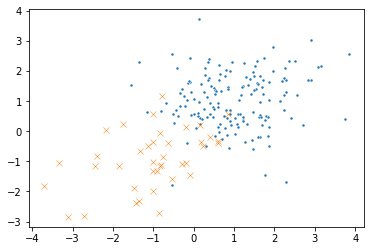

In [ ]:
import seaborn as sns
sns.scatterplot(class1_train[:,0],class1_train[:,1],marker='.')
sns.scatterplot(class2_train[:,0],class2_train[:,1],marker='x')
plt.show()

Determine Prior Probabilities

In [ ]:
no_of_samples = len(class1_train)+len(class2_train)

In [ ]:
prob_c1 = len(class1_train)/no_of_samples
prob_c1

0.8040201005025126

In [ ]:
prob_c2 = len(class2_train)/no_of_samples
prob_c2

0.19597989949748743

Plotting the prior

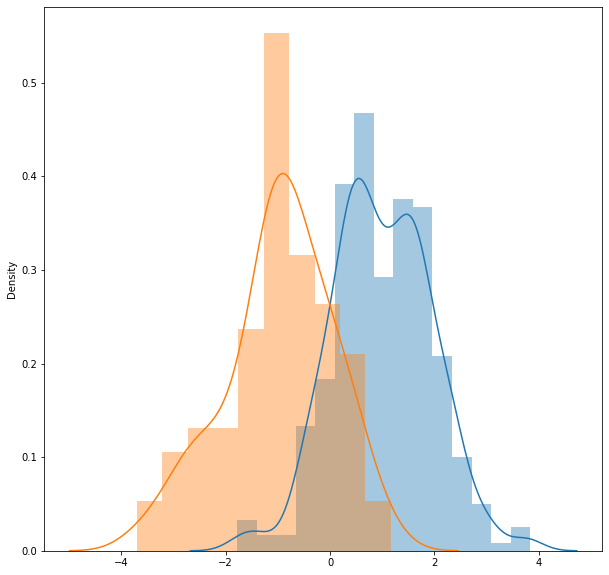

In [ ]:
#Requires proper labelling
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
sns.distplot(class1_train,label='C1')
sns.distplot(class2_train)
plt.show()

Plot the data distribution and the histogram of feature 1 and feature 2 in the x axis and the y -axis respectively. The distribution of feature 1 wil be along the top of the x-axis and feature 2 along the right of the y axis.

# Plot the Prior by discretizing the data

In [ ]:
f1 = pd.read_csv('/content/c1.csv')
f2 = pd.read_csv('/content/c2.csv')
f1['class'] = 0
f2['class'] = 1
df = pd.concat([f1,f2])
df

,x1,x2,class
0,0.320478,0.481092,0
1,0.050691,0.096400,0
2,3.748470,0.403931,0
3,2.256374,2.089962,0
4,1.421454,1.243629,0
...,...,...,...
34,-0.201574,-1.057435,1
35,-1.124155,-0.488612,1
36,0.600648,-0.382622,1
37,0.162933,0.200207,1


In [ ]:
feat1 = df['x1'].values.ravel()
feat2 = df['x2'].values.ravel()

num_bins = 10
bin1 = pd.cut(feat1, bins=num_bins)
bin2 = pd.cut(feat2, bins=num_bins)
print(bin2)

[(0.437, 1.094], (-0.22, 0.437], (-0.22, 0.437], (1.75, 2.407], (1.094, 1.75], ..., (-1.533, -0.876], (-0.876, -0.22], (-0.876, -0.22], (-0.22, 0.437], (-2.853, -2.19]]
Length: 199
Categories (10, interval[float64]): [(-2.853, -2.19] < (-2.19, -1.533] < (-1.533, -0.876] <
                                     (-0.876, -0.22] ... (1.094, 1.75] < (1.75, 2.407] <
                                     (2.407, 3.064] < (3.064, 3.72]]


In [ ]:
codes_f1 = bin1.codes
codes_f2 = bin2.codes

print(codes_f1)
print(codes_f2)

df[['bin1']] = codes_f1
df[['bin2']] = codes_f2

[5 4 9 7 6 5 7 7 7 6 6 4 8 6 7 4 6 7 5 8 6 6 4 6 7 4 8 6 9 5 5 4 5 5 6 5 6
 6 6 5 5 6 7 5 7 5 4 4 5 7 4 5 3 7 5 5 5 5 6 4 4 7 7 4 4 4 8 5 5 4 4 6 5 7
 5 6 7 7 4 6 7 6 6 4 7 7 7 4 6 5 8 8 3 5 7 5 2 5 5 5 5 4 5 4 4 6 5 6 7 7 6
 6 6 5 7 6 5 5 6 6 6 6 6 5 6 8 5 7 5 6 8 5 4 6 5 6 5 5 7 4 7 6 7 6 7 6 8 5
 6 7 5 5 7 3 5 9 7 5 7 7 3 3 4 3 3 5 5 2 3 2 5 3 1 4 3 3 4 4 1 5 3 3 3 0 2
 3 6 1 0 4 3 3 2 0 4 3 5 5 3]
[5 4 4 7 6 5 5 6 8 4 3 4 7 4 6 5 4 8 4 6 6 3 8 5 6 3 5 6 7 4 7 6 5 6 6 7 7
 6 7 9 7 4 5 5 4 7 1 5 5 6 5 6 7 5 5 6 7 6 6 6 8 3 4 6 6 5 6 6 3 7 5 3 7 5
 7 5 6 6 6 3 1 6 7 5 6 5 5 5 4 6 7 6 5 4 7 4 6 5 7 6 4 6 6 5 6 4 5 7 7 6 5
 5 6 4 6 6 5 6 7 4 4 6 7 5 5 8 6 7 3 7 4 4 5 5 5 7 7 6 4 5 4 4 5 4 4 4 7 5
 5 5 5 5 2 5 5 8 4 5 5 6 6 0 1 2 2 4 3 4 3 2 3 2 3 4 0 3 2 2 2 3 2 4 3 2 1
 5 5 0 1 3 1 2 4 0 2 3 3 4 0]


In [ ]:
df

,x1,x2,class,bin1,bin2
0,0.320478,0.481092,0,5,5
1,0.050691,0.096400,0,4,4
2,3.748470,0.403931,0,9,4
3,2.256374,2.089962,0,7,7
4,1.421454,1.243629,0,6,6
...,...,...,...,...,...
34,-0.201574,-1.057435,1,4,2
35,-1.124155,-0.488612,1,3,3
36,0.600648,-0.382622,1,5,3
37,0.162933,0.200207,1,5,4


In [ ]:
tmp = list(df['bin1'].unique())
tmp.sort(reverse=False)
tmp

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
cnt_b1_c1 = []
for i in range(num_bins):
  cnt_b1_c1.append(0)

for index, row in df.iterrows():
  if row['class'] == 0:
    cnt_b1_c1[int(row['bin1'])] += 1

cnt_b1_c2 = []
for i in range(num_bins):
  cnt_b1_c2.append(0)

for index, row in df.iterrows():
  if row['class'] == 1:
    cnt_b1_c2[int(row['bin1'])] += 1

cnt_b2_c1 = []
for i in range(num_bins):
  cnt_b2_c1.append(0)

for index, row in df.iterrows():
  if row['class'] == 0:
    cnt_b2_c1[int(row['bin2'])] += 1

cnt_b2_c2 = []
for i in range(num_bins):
  cnt_b2_c2.append(0)

for index, row in df.iterrows():
  if row['class'] == 1:
    cnt_b2_c2[int(row['bin2'])] += 1

print(cnt_b1_c1)
print(cnt_b1_c2)
print(cnt_b2_c1)
print(cnt_b2_c2)

[0, 0, 1, 3, 24, 46, 40, 34, 9, 3]
[3, 3, 4, 16, 6, 6, 1, 0, 0, 0]
[0, 2, 1, 8, 28, 45, 42, 27, 6, 1]
[5, 4, 11, 10, 6, 2, 1, 0, 0, 0]


In [ ]:
y11 = np.array(cnt_b1_c1)/len(f1)
y12 = np.array(cnt_b1_c2)/len(f2)
y21 = np.array(cnt_b2_c1)/len(f1)
y22 = np.array(cnt_b2_c2)/len(f2)

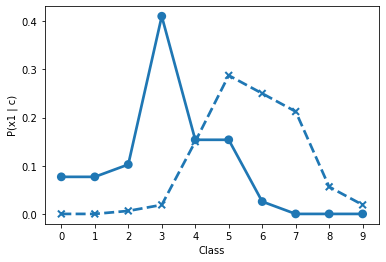

In [ ]:
# prior of x1
sns.pointplot(tmp,y11, linestyles="--",markers =['x'] )
sns.pointplot(tmp,y12,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(x1 | c)")
plt.show()

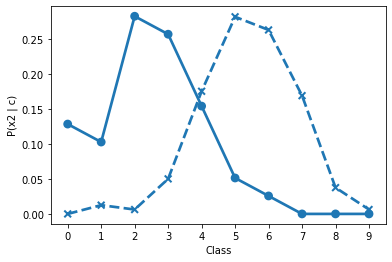

In [ ]:
# prior of x2
sns.pointplot(tmp,y21, linestyles="--",markers =['x'] )
sns.pointplot(tmp,y22,linestyles='-',markers=['o'])
plt.xlabel("Class")
plt.ylabel("P(x2 | c)")
plt.show()

In [ ]:
cnt_x1 = [0 for x in range(num_bins)]

for index, row in df.iterrows():
  cnt_x1[int(row['bin1'])] += 1

cnt_x2 = [0 for x in range(num_bins)]

for index, row in df.iterrows():
  cnt_x2[int(row['bin2'])] += 1


In [ ]:
# class given x
num11 = [0 for x in range(num_bins)]
for index, row in df.iterrows():
    if row['class'] == 0 :
      num11[int(row['bin1'])] += 1

num12 = [0 for x in range(num_bins)]
for index, row in df.iterrows():
    if row['class'] == 0 :
      num12[int(row['bin2'])] += 1

num21 = [0 for x in range(num_bins)]
for index, row in df.iterrows():
    if row['class'] == 1 :
      num21[int(row['bin1'])] += 1

num22 = [0 for x in range(num_bins)]
for index, row in df.iterrows():
    if row['class'] == 1 :
      num22[int(row['bin2'])] += 1

print(num11)
print(num12)
print(num21)
print(num22)

[0, 0, 1, 3, 24, 46, 40, 34, 9, 3]
[0, 2, 1, 8, 28, 45, 42, 27, 6, 1]
[3, 3, 4, 16, 6, 6, 1, 0, 0, 0]
[5, 4, 11, 10, 6, 2, 1, 0, 0, 0]


**Plot the posterior**

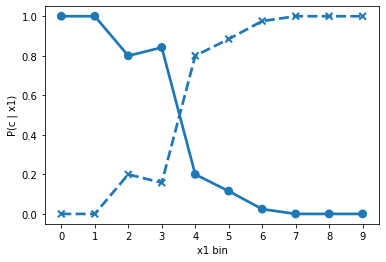

In [ ]:
# posterior of x1
pst11 = [n/m for n,m in zip(num11,cnt_x1)]
pst21 = [n/m for n,m in zip(num21,cnt_x1)]
sns.pointplot(tmp,pst11, linestyles="--",markers =['x'] )
sns.pointplot(tmp,pst21,linestyles='-',markers=['o'])
plt.xlabel("x1 bin")
plt.ylabel("P(c | x1)")
plt.show()

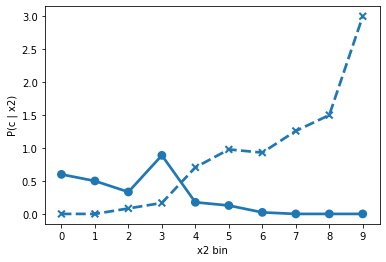

In [ ]:
# posterior of x2
pst12 = [n/m for n,m in zip(num11,cnt_x2)]
pst22 = [n/m for n,m in zip(num21,cnt_x2)]
sns.pointplot(tmp,pst12, linestyles="--",markers =['x'] )
sns.pointplot(tmp,pst22,linestyles='-',markers=['o'])
plt.xlabel("x2 bin")
plt.ylabel("P(c | x2)")
plt.show()

Plot the histogram of C1

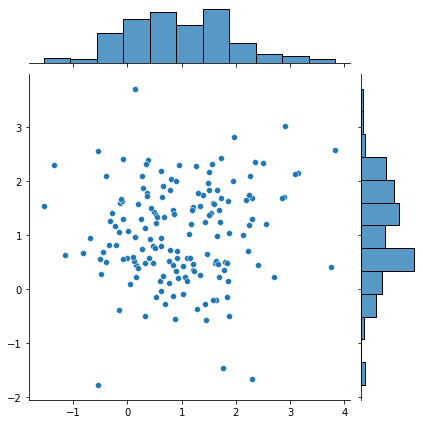

In [ ]:
sns.jointplot(x=class1_train[:,0], y=class1_train[:,1])

Plot the histogram of C2

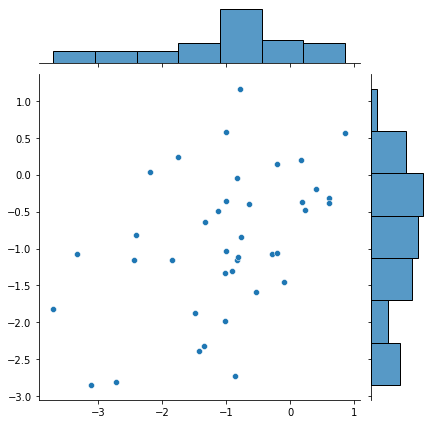

In [ ]:
sns.jointplot(x=class2_train[:,0], y=class2_train[:,1])

# In the report please explain the plots that you are getting clearly explaining the reason .

In [ ]:
iris = pd.read_csv('/content/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris = iris[['SepalLengthCm', 'Species']]
iris

,SepalLengthCm,Species
0,5.1,Iris-setosa
1,4.9,Iris-setosa
2,4.7,Iris-setosa
3,4.6,Iris-setosa
4,5.0,Iris-setosa
...,...,...
145,6.7,Iris-virginica
146,6.3,Iris-virginica
147,6.5,Iris-virginica
148,6.2,Iris-virginica


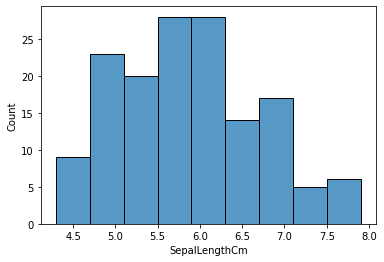

In [ ]:
x = iris['SepalLengthCm']
sns.histplot(x)

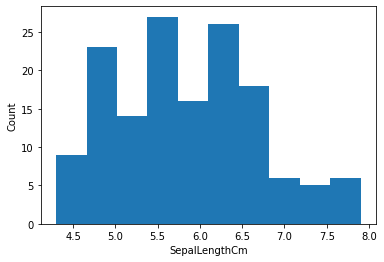

In [ ]:
plt.hist(x)
plt.xlabel("SepalLengthCm")
plt.ylabel("Count")
plt.show()

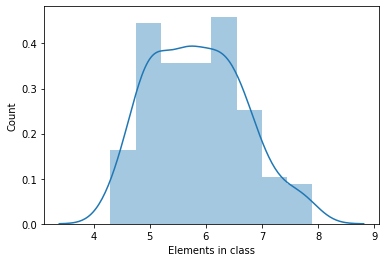

In [ ]:
#Probability distribution of SepalLength
sns.distplot(iris['SepalLengthCm'].to_list())
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()